In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from keras.utils.np_utils import to_categorical 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline 
import warnings
import os
train=pd.read_csv('/content/drive/My Drive/micrographs/uhcs-metadata.csv')
train.shape

(1732, 18)

In [ ]:
train=train[train['primary_microconstituent'].notna()]
for i in train.primary_microconstituent.unique():
  if i!='pearlite' and i!='spheroidite':
    train=train[train['primary_microconstituent']!=i]
  else:
    continue
train['primary_microconstituent']=train['primary_microconstituent'].map({'pearlite':0,'spheroidite':1})
train.shape

(498, 18)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128,128,3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(2, activation='sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])


## Model


In [ ]:
pixel=[]
for i in train['path'].unique():
    img=(plt.imread('/content/drive/My Drive/micrographs/'+str(i)))
    pixel.append(img)    

In [ ]:
pixel[0].shape

(522, 645)

In [ ]:
from skimage.transform import resize
pixel_resize=[]
for i in range(len(pixel)):
  pixel_resize.append(resize(pixel[i], (128,128,3)))
X=np.array(pixel_resize)

In [ ]:
y=train['primary_microconstituent']
y= keras.utils.to_categorical(y,2)

this is  [1. 0.]


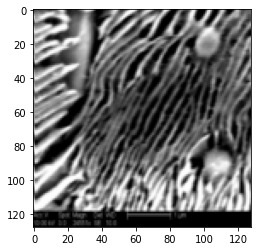

In [ ]:
plt.imshow(X[250])
print('this is ',y[250])

Data Augmentation

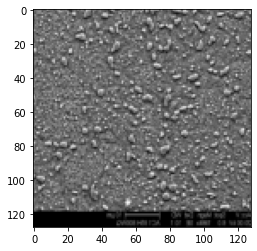

In [ ]:
from skimage.transform import rotate
from skimage.util import random_noise
from skimage.filters import gaussian
from scipy import ndimage
v=np.fliplr(X[1])
plt.imshow(v)


In [ ]:
final_train_data = []
final_target_train = []
for i in (range(X.shape[0])):
    final_train_data.append(X[i])
    final_train_data.append(rotate(X[i], angle=45, mode = 'wrap'))
    final_train_data.append(np.fliplr(X[i]))
    final_train_data.append(np.flipud(X[i]))
    final_train_data.append(random_noise(X[i],var=0.2**2))
    for j in range(5):
        final_target_train.append(y[i])
X_1=np.array(final_train_data)
y_1=np.array(final_target_train)

In [ ]:
model.fit(X_1[:1900],y_1[:1900], epochs=100,batch_size=100,validation_data=(X_1[1900:], y_1[1900:]))

Epoch 1/100
19/19 [==============================] - 146s 8s/step - loss: 0.2983 - accuracy: 0.8205 - val_loss: 0.3565 - val_accuracy: 0.7424
Epoch 2/100
19/19 [==============================] - 145s 8s/step - loss: 0.2586 - accuracy: 0.8247 - val_loss: 0.3631 - val_accuracy: 0.7763
Epoch 3/100
19/19 [==============================] - 145s 8s/step - loss: 0.2245 - accuracy: 0.8332 - val_loss: 0.3247 - val_accuracy: 0.8186
Epoch 4/100
19/19 [==============================] - 145s 8s/step - loss: 0.2392 - accuracy: 0.8353 - val_loss: 0.3785 - val_accuracy: 0.7627
Epoch 5/100
19/19 [==============================] - 144s 8s/step - loss: 0.2144 - accuracy: 0.8289 - val_loss: 0.3962 - val_accuracy: 0.7712
Epoch 6/100
19/19 [==============================] - 143s 8s/step - loss: 0.2300 - accuracy: 0.8368 - val_loss: 0.3734 - val_accuracy: 0.7780
Epoch 7/100
19/19 [==============================] - 144s 8s/step - loss: 0.2099 - accuracy: 0.8363 - val_loss: 0.4587 - val_accuracy: 0.7763
Epoch 

## Pealite Prediction



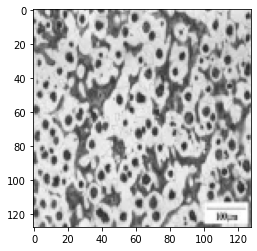

In [ ]:
test=plt.imread('/content/drive/My Drive/micrographs/download.jpg')
test_resize=resize(test, (128,128,3))
plt.imshow(test_resize)

Probability of Pearlite is almost 1.0

In [ ]:
model.predict(np.array( [test_resize,] ))

array([[1.0000000e+00, 4.5444135e-06]], dtype=float32)

## Pearlite Prediction

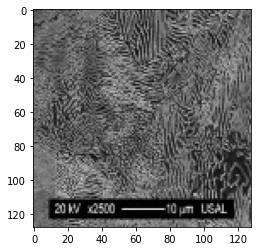

In [ ]:
test=plt.imread('/content/drive/My Drive/micrographs/pearlite_1.jpg')
test_resize=resize(test, (128,128,3))
plt.imshow(test_resize)

obtained high probability for pearlite

In [ ]:
model.predict(np.array( [test_resize,] ))

array([[0.99356925, 0.07023732]], dtype=float32)

## Spheroidite

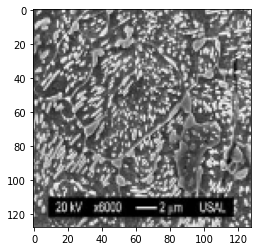

In [ ]:
test=plt.imread('/content/drive/My Drive/micrographs/spheroidite.jpg')
test_resize=resize(test, (128,128,3))
plt.imshow(test_resize)

Obtained 0.95 probability for spheroidite

In [ ]:
model.predict(np.array( [test_resize,] ))

array([[0.51769495, 0.95233536]], dtype=float32)

## Spheroidite 

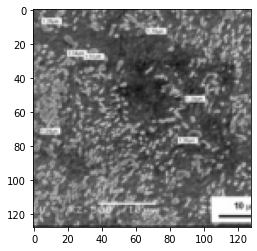

In [ ]:
test=plt.imread('/content/drive/My Drive/micrographs/sphere_1.jpg')
test_resize=resize(test, (128,128,3))
plt.imshow(test_resize)

Obtained 0.985 probability for spheroidite

In [ ]:
model.predict(np.array( [test_resize,] ))

array([[0.04290409, 0.98591334]], dtype=float32)

## Pearlite

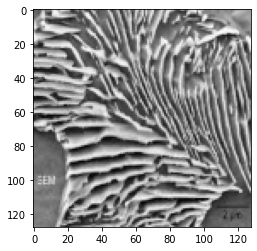

In [ ]:
test=plt.imread('/content/drive/My Drive/micrographs/pearlite_2.jpg')
test_resize=resize(test, (128,128,3))
plt.imshow(test_resize)

Obtained probability of 1.0 for Pearlite

In [ ]:
model.predict(np.array( [test_resize,] ))

array([[1.000000e+00, 9.792497e-22]], dtype=float32)